In [1]:
import sys
import os
import getpass
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

user = getpass.getuser()
sys.dont_write_bytecode = True

sys.path.insert(0, '/Users/{}/Box/DataViz Projects/Utility Code'.format(user))

from utils_io import *  # initial imports
reload_module('utils_io')  # reload after update to utils_io.py
from utils_io import *  # reload reflects updates

# Housing and Community Development Annual Progress Report Summaries <a name='top'></a>

## Table of Contents 
1. [Pre-processing steps](#preprocessing)
2. [Summarize certificates of occupancy](#summarize_certificates)

## Pre-processing steps

In [21]:
apr_id = 'briv-ikjp'

In [22]:
apr_df = pull_df_from_socrata(apr_id)

pulling data in 3 chunks of 13000 rows each
pulling chunk 0
pulling chunk 1
pulling chunk 2
took 9.0537 seconds


## Summarize certificates of occupancy <a name='summarize_certificates'></a>

Summarize certificate of occupancy by jurisdiction, affordibility, and growth areas. 

**[Skip to next section]()**

In [23]:
apr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30864 entries, 0 to 30863
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   mtc_id                       30864 non-null  object 
 1   mtc_type                     30667 non-null  object 
 2   mtc_year                     30864 non-null  float64
 3   mtc_vlow_income_dr           30364 non-null  float64
 4   mtc_vlow_income_ndr          30360 non-null  float64
 5   mtc_vlow_tot                 30864 non-null  float64
 6   mtc_low_income_dr            30363 non-null  float64
 7   mtc_low_income_ndr           30358 non-null  float64
 8   mtc_low_tot                  30864 non-null  float64
 9   mtc_mod_income_dr            30366 non-null  float64
 10  mtc_mod_income_ndr           30385 non-null  float64
 11  mtc_mod_tot                  30864 non-null  float64
 12  mtc_above_mod_income         30824 non-null  float64
 13  mtc_total_units 

In [24]:
apr_df['mtc_type'].unique()

array(['PERMIT', 'CERTIFICATE', 'ENTITLEMENT', nan], dtype=object)

In [25]:
apr_certificates_df = apr_df[apr_df['mtc_type'] == 'CERTIFICATE'].copy()

In [26]:
apr_certificates_df.columns

Index(['mtc_id', 'mtc_type', 'mtc_year', 'mtc_vlow_income_dr',
       'mtc_vlow_income_ndr', 'mtc_vlow_tot', 'mtc_low_income_dr',
       'mtc_low_income_ndr', 'mtc_low_tot', 'mtc_mod_income_dr',
       'mtc_mod_income_ndr', 'mtc_mod_tot', 'mtc_above_mod_income',
       'mtc_total_units', 'mtc_issue_dt', 'mtc_address_full',
       'mtc_geocode_address', 'mtc_geocode_type', 'mtc_mapped', 'mtc_lat',
       'mtc_long', 'mtc_wkt', 'mtc_pda', 'mtc_tpa', 'mtc_housing_element_site',
       'mtc_notes', 'jurs_name', 'cnty_name', 'year', 'prior_apn', 'apn',
       'street_address', 'project_name', 'jurs_tracking_id', 'unit_cat_desc',
       'tenure', 'vlow_income_dr', 'vlow_income_ndr', 'low_income_dr',
       'low_income_ndr', 'mod_income_dr', 'mod_income_ndr', 'above_mod_income',
       'ent_approve_dt', 'no_entitlements', 'bp_vlow_income_dr',
       'bp_vlow_income_ndr', 'bp_low_income_dr', 'bp_low_income_ndr',
       'bp_mod_income_dr', 'bp_mod_income_ndr', 'bp_above_mod_income',
       'bp_

In [27]:
apr_certificates_df[summary_cols]

,jurs_name,cnty_name,mtc_year,co_vlow_income_dr,co_vlow_income_ndr,co_low_income_dr,co_low_income_ndr,co_mod_income_dr,co_mod_income_ndr,co_above_mod_income,mtc_total_units,mtc_pda,mtc_tpa
1,SUNNYVALE,SANTA CLARA,2019.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False,False
8,SANTA ROSA,SONOMA,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN
9,SANTA ROSA,SONOMA,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,NaN,NaN
26,MILLBRAE,SAN MATEO,2019.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,False,False
35,LIVERMORE,ALAMEDA,2019.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30859,SONOMA COUNTY,SONOMA,2019.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,False,False
30860,ROHNERT PARK,SONOMA,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,False,False
30861,SUNNYVALE,SANTA CLARA,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,True,True
30862,SUNNYVALE,SANTA CLARA,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,True,True


In [28]:
summary_cols = ['jurs_name', 
                'cnty_name',
                'mtc_year',
                'co_vlow_income_dr',
                'co_vlow_income_ndr',
                'co_low_income_dr',
                'co_low_income_ndr',
                'co_mod_income_dr',
                'co_mod_income_ndr',
                'co_above_mod_income',
                'mtc_total_units',
                'mtc_pda',
                'mtc_tpa']
group_cols = ['jurs_name', 'cnty_name','mtc_year','mtc_pda','mtc_tpa']

In [29]:
#Summarize by jurisdictions
apr_certificates_summary = apr_certificates_df[summary_cols].groupby(group_cols).aggregate('sum').reset_index()

In [30]:
apr_certificates_summary

,jurs_name,cnty_name,mtc_year,mtc_pda,mtc_tpa,co_vlow_income_dr,co_vlow_income_ndr,co_low_income_dr,co_low_income_ndr,co_mod_income_dr,co_mod_income_ndr,co_above_mod_income,mtc_total_units
0,ALAMEDA COUNTY,ALAMEDA,2018.0,False,False,0.0,0.0,0.0,11.0,0.0,0.0,56.0,56.0
1,ALAMEDA COUNTY,ALAMEDA,2018.0,False,True,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,ALAMEDA COUNTY,ALAMEDA,2019.0,False,False,0.0,0.0,0.0,16.0,0.0,0.0,64.0,64.0
3,ALAMEDA COUNTY,ALAMEDA,2019.0,False,True,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,ALAMEDA COUNTY,ALAMEDA,2019.0,True,False,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,WINDSOR,SONOMA,2019.0,False,True,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
345,WOODSIDE,SAN MATEO,2018.0,False,False,0.0,4.0,0.0,1.0,0.0,1.0,7.0,7.0
346,WOODSIDE,SAN MATEO,2019.0,False,False,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0
347,YOUNTVILLE,NAPA,2018.0,False,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [49]:
apr_certificates_summary.to_csv('apr_certficates_by_affordability_growth_area_2018_2019.csv',index=False)

In [59]:
#Group cols for region
region_summary_cols = ['jurs_name', 
                'cnty_name',
                'mtc_vlow_income_dr',
                'mtc_low_income_dr',
                'mtc_mod_income_dr',
                'mtc_above_mod_income',
                'mtc_pda',
                'mtc_tpa']
region_group_cols = ['mtc_pda','mtc_tpa']

In [60]:
#Summarize for region
apr_certificates_summary_region = apr_certificates_df[region_summary_cols].groupby(region_group_cols).aggregate('sum')

In [61]:
apr_certificates_summary_region.head(5)

mtc_vlow_income_dr  mtc_low_income_dr  mtc_mod_income_dr  \
mtc_pda mtc_tpa                                                             
False   False                 284.0              660.0              406.0   
        True                    4.0                1.0               11.0   
True    False                 441.0              159.0              106.0   
        True                 1843.0              948.0              179.0   

                 mtc_above_mod_income  
mtc_pda mtc_tpa                        
False   False                  9181.0  
        True                   1507.0  
True    False                  3541.0  
        True                  14111.0

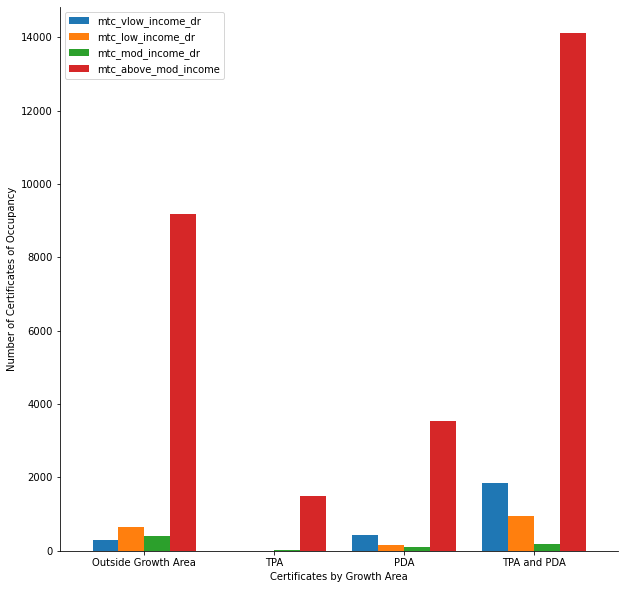

In [102]:
width= 0.8
x_labels = ['Outside Growth Area','TPA','PDA','TPA and PDA']
fig, ax= plt.subplots(figsize=(10,10))
apr_certificates_summary_region.plot(kind='bar',ax=ax,width=width)

# Set the label for the x-axis
ax.set_xlabel("Certificates by Growth Area")

# Set the label for the y-axis
ax.set_ylabel("Number of Certificates of Occupancy")

# Update x tick lables
ax.set_xticklabels(x_labels,rotation='horizontal')

# Only show xy axis border 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()